In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import random
import os, sys

## Correctness of time generator

In [3]:
lambda_ = 7.000
a_2l = 0.500
a_2u = 1.200
alph = 0.150
beta = 3.600

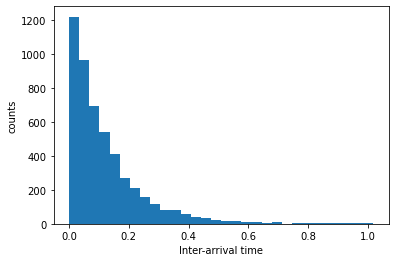

In [4]:
def generate_Interarrival_Time(lambda_, a_2l, a_2u):
    # Generate inter-arrival time
    a_1_k = np.random.exponential(scale=1/lambda_, size=None)
    a_2_k = np.random.uniform(low=a_2l, high=a_2u, size=None)
    a_k = a_1_k*a_2_k
    return a_k

plt.hist([generate_Interarrival_Time(lambda_, a_2l, a_2u) for i in range(5000)], bins=30)
plt.ylabel('counts')
plt.xlabel('Inter-arrival time');

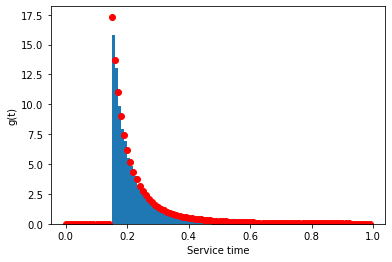

In [5]:
def generate_Service_Time(alph, beta):
    # Generate service time
    gamma = (beta-1)/(alph**(1-beta))
    
    service_time = alph
    # Must not equal alph
    while service_time == alph: 
        # Get G(t) from [0,1]
        Gt = random.random()
        # Find the reverse
        service_time = ((Gt*(1-beta)/gamma) + (alph**(1-beta))) ** (1/(1-beta))
    return service_time

gamma = (beta-1)/(alph**(1-beta))
y = []
for t in arange(0.0, 1.0, 0.01):
    if 0 <= t < alph:
        y += [0]
    elif t >= alph:
        y += [gamma/(t**beta)]
plt.plot(arange(0.0, 1.0, 0.01), y , 'o', color='red')

plt.hist([generate_Service_Time(alph, beta) for i in range(5000)], bins=arange(0.0, 1.0, 0.01), density=True)
plt.ylabel('g(t)')
plt.xlabel('Service time');

## Length of Simutation

In [43]:
mrts_1000 = np.genfromtxt('means_1000.txt', dtype='float')
mrts_5000 = np.genfromtxt('means_5000.txt', dtype='float')
mrts_10000 = np.genfromtxt('means_10000.txt', dtype='float')

In [45]:
print(mrts_10000 )

[0.3731 0.3714 0.3753 0.385  0.3718 0.3764 0.3752 0.3716 0.3762 0.373
 0.3819 0.3762 0.3776 0.3682 0.3774 0.3752 0.3772 0.3702 0.3804 0.3686]


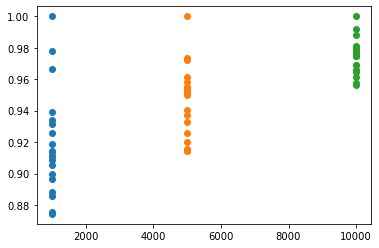

In [44]:
plt.plot([1000 for i in range(20)], [i/max(mrts_1000) for i in mrts_1000] , 'o')
plt.plot([5000 for i in range(20)], [i/max(mrts_5000) for i in mrts_5000] , 'o')
plt.plot([10000 for i in range(20)], [i/max(mrts_10000) for i in mrts_10000], 'o')